<a href="https://colab.research.google.com/github/TimotheeeNiven/IntroML_TNiven/blob/main/Homework1_TNiven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = '/content/drive/MyDrive/IntroML/CSVFiles/D3.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


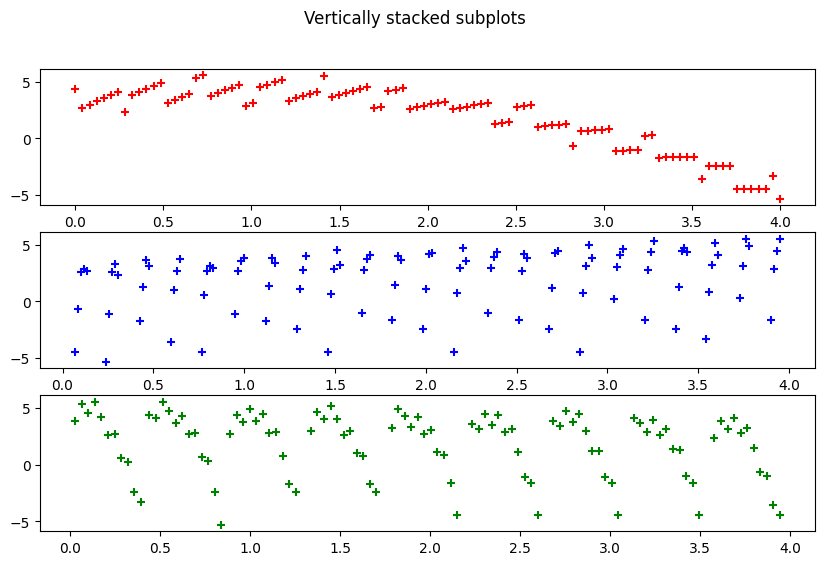

In [38]:
#Extracting Data
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]

m = len(Y) #Number of total rows

# Scatter plot
fig, axs = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
axs[0].scatter(X1, Y, color='red', marker='+')
axs[1].scatter(X2, Y, color='blue', marker='+')
axs[2].scatter(X3, Y, color='green', marker='+')

In [39]:
X_0 = np.ones((m, 1))
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X_0, X_2))
X3 = np.hstack((X_0, X_3))
X1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [40]:
theta1 = np.zeros(2)
theta2 = np.zeros(2)
theta3 = np.zeros(2)

In [41]:
def compute_cost(X, y, theta):

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [42]:
cost1 = compute_cost(X1, Y, theta1)
cost2 = compute_cost(X2, Y, theta2)
cost3 = compute_cost(X3, Y, theta3)
print('The cost for given values of theta_0 and theta_1 for X1 =', cost1)
print('The cost for given values of theta_0 and theta_1 for X2 =', cost2)
print('The cost for given values of theta_0 and theta_1 for X3 =', cost3)

The cost for given values of theta_0 and theta_1 for X1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for X2 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for X3 = 5.524438459196242


In [43]:
def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [44]:
theta1 = [0., 0.]
theta2 = [0., 0.]
theta3 = [0., 0.]
iterations = 1500
alpha = 0.1

In [45]:
theta1, cost_history1 = gradient_descent(X1, Y, theta1, alpha, iterations)
print('Final value of theta for X1 =', theta1)
print('cost_history for X1 =', cost_history1)
theta2, cost_history2 = gradient_descent(X2, Y, theta2, alpha, iterations)
print('Final value of theta for X2 =', theta2)
print('cost_history for X2 =', cost_history2)
theta3, cost_history3 = gradient_descent(X3, Y, theta3, alpha, iterations)
print('Final value of theta for X3 =', theta3)
print('cost_history for X3 =', cost_history3)

Final value of theta for X1 = [ 5.92794892 -2.03833663]
cost_history for X1 = [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]
Final value of theta for X2 = [0.73606043 0.55760761]
cost_history for X2 = [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]
Final value of theta for X3 = [ 2.8714221  -0.52048288]
cost_history for X3 = [4.66843939 4.49602325 4.43685075 ... 3.62945112 3.62945112 3.62945112]


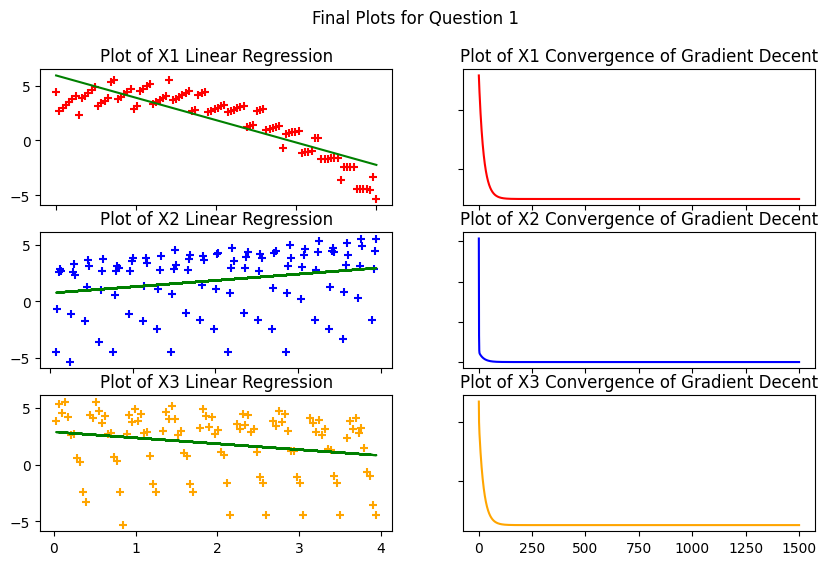

In [46]:
#This entire section is dedicated to plotting both the Linear regression over the original plot points
#as well as show the Gradient decent and how many iterations the porgram went through before beveling
fig, axs = plt.subplots(3,2)
plt.rcParams["figure.figsize"] = (10, 6)
fig.suptitle('Final Plots for Question 1')

axs[0,0].set_title('Plot of X1 Linear Regression')
axs[1,0].set_title('Plot of X2 Linear Regression')
axs[2,0].set_title('Plot of X3 Linear Regression')

axs[0,0].scatter(X1[:, 1], Y, color='red', marker='+', label='Training Data')
axs[0,0].plot(X1[:, 1], X1.dot(theta1), color='green', label='Linear Regression')

axs[1,0].scatter(X2[:, 1], Y, color='blue', marker='+', label='Training Data')
axs[1,0].plot(X2[:, 1], X2.dot(theta2), color='green', label='Linear Regression')

axs[2,0].scatter(X3[:, 1], Y, color='orange', marker='+', label='Training Data')
axs[2,0].plot(X3[:, 1], X3.dot(theta3), color='green', label='Linear Regression')

axs[0,1].set_title('Plot of X1 Convergence of Gradient Decent')
axs[1,1].set_title('Plot of X2 Convergence of Gradient Decent')
axs[2,1].set_title('Plot of X3 Convergence of Gradient Decent')

axs[0,1].plot(range(1, iterations + 1), cost_history1, color='red')
axs[1,1].plot(range(1, iterations + 1), cost_history2, color='blue')
axs[2,1].plot(range(1, iterations + 1), cost_history3, color='orange')
for ax in axs.flat:
    ax.label_outer()
# Show the plot
plt.show()


PROBLEM 2

In [51]:
#In this part of the code we are going to use X4 as the definition for X1 + X2 + X3
X4 = np.hstack((X_0, X_1, X_2, X_3))
m4 = len(X4);
theta4 = np.zeros(4)
alpha1 = 0.05
X4[:5]


array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [48]:
theta4, cost_history4 = gradient_descent(X4, Y, theta4, alpha1, iterations)
print('Final value of theta for X =', theta4)
print('cost_history for X =', cost_history4)

Final value of theta for X1 = [ 5.31128136 -2.0033116   0.5330402  -0.26517886]
cost_history for X1 = [4.35632837 3.99754934 3.73994659 ... 0.73846469 0.73846469 0.73846469]


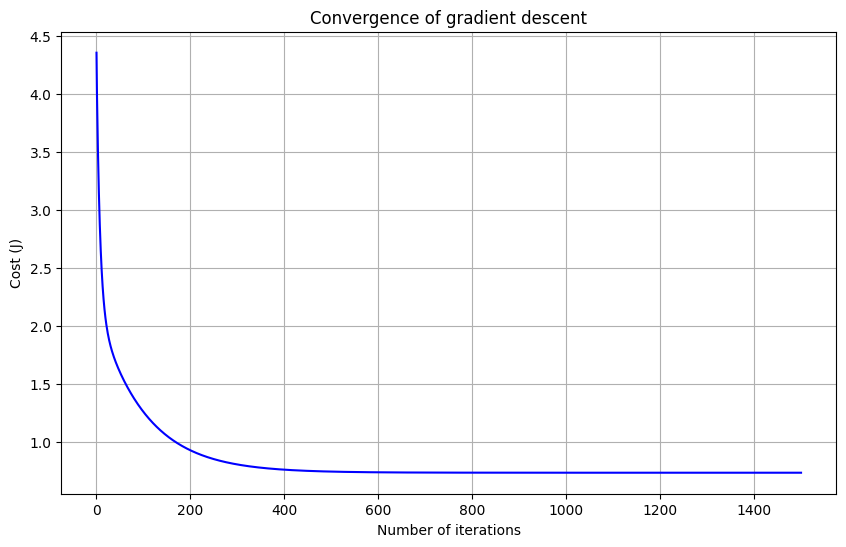

In [49]:
#Here is the final plot

plt.plot(range(1, iterations + 1), cost_history4, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [50]:
def predict(input_features, theta):
    # This is where we determine the array is the correct size
    input_features = np.array(input_features)

    # Implement an intercept term
    input_features = np.insert(input_features, 0, 1, axis=0)

    # Calculate the predicted value
    prediction = input_features.dot(theta)

    return prediction

# Example usage:
predicted_value = predict([1,1,1], theta4)
print(f"Predicted value for first example: {predict([1,1,1], theta4)}")
print(f"Predicted value for second example: {predict([2,0,4], theta4)}")
print(f"Predicted value for third example: {predict([3,2,1], theta4)}")

Predicted value for first example: 3.5758310955346353
Predicted value for second example: 0.24394270393310014
Predicted value for third example: 0.10224809362461512
